[LightGBM] [Info] Number of positive: 859, number of negative: 2341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268437 -> initscore=-1.002565
[LightGBM] [Info] Start training from score -1.002565
[[576  22]
 [ 35 167]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       598
           1       0.88      0.83      0.85       202

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.93      0.93      0.93       800

모델 정확도: 0.9287


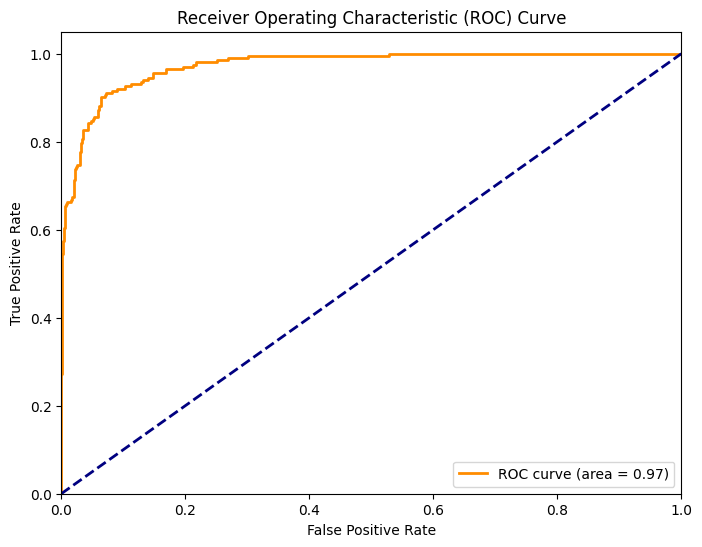

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,roc_curve, auc
import matplotlib.pyplot as plt


health_df = pd.read_csv('../data/gym_churn_us.csv')

X = health_df.drop('Churn', axis=1)  
y = health_df['Churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

y_prob = lgbm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [3]:
new_data = pd.DataFrame({
    'gender': [0],
    'Near_Location': [1],
    'Partner': [0],
    'Promo_friends': [0],
    'Phone': [1],
    'Contract_period': [12],
    'Group_visits': [1],
    'Age': [31],
    'Avg_additional_charges_total': [113.20293765105819],
    'Month_to_end_contract': [12.0],
    'Lifetime': [7], 
    'Avg_class_frequency_total': [1.9229360550418195],
    'Avg_class_frequency_current_month': [0.9102435215196407]
}, index=[0])

# new_data = pd.DataFrame({
#     'gender': [1],
#     'Near_Location': [1],
#     'Partner': [1],
#     'Promo_friends': [0],
#     'Phone': [1],
#     'Contract_period': [1],
#     'Group_visits': [0],
#     'Age': [27],
#     'Avg_additional_charges_total': [226.7838237446521],
#     'Month_to_end_contract': [1.0],
#     'Lifetime': [2], 
#     'Avg_class_frequency_total': [2.3485353357599856],
#     'Avg_class_frequency_current_month': [1.5843158272716689]
# }, index=[0])

# new_data = pd.DataFrame({
#     'gender': [1],
#     'Near_Location': [1],
#     'Partner': [0],
#     'Promo_friends': [0],
#     'Phone': [1],
#     'Contract_period': [1],
#     'Group_visits': [0],
#     'Age': [28],
#     'Avg_additional_charges_total': [42.160809042705715],
#     'Month_to_end_contract': [1.0],
#     'Lifetime': [1], 
#     'Avg_class_frequency_total': [0.4250114097298257],
#     'Avg_class_frequency_current_month': [0.6052465413331591]
# }, index=[0])

prediction = lgbm.predict(new_data)
print(f"예측된 결과: {'나갈 회원' if prediction[0] == 1 else '남을 회원'}")

예측된 결과: 남을 회원


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[LightGBM] [Info] Number of positive: 859, number of negative: 2341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268437 -> initscore=-1.002565
[LightGBM] [Info] Start training from score -1.002565
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}
[[577  21]
 [ 37 165]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       598
           1       0.89      0.82      0.85       202

    accuracy                           0.93       

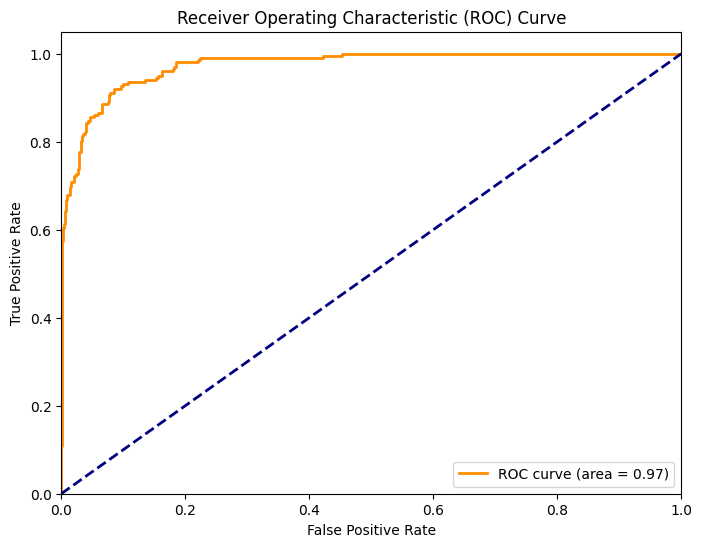

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

health_df = pd.read_csv('../data/gym_churn_us.csv')

X = health_df.drop('Churn', axis=1)  
y = health_df['Churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10],
    'num_leaves': [31, 50, 70],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(estimator=LGBMClassifier(random_state=42), param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [8]:
new_data = pd.DataFrame({
    'gender': [0],
    'Near_Location': [1],
    'Partner': [0],
    'Promo_friends': [0],
    'Phone': [1],
    'Contract_period': [12],
    'Group_visits': [1],
    'Age': [31],
    'Avg_additional_charges_total': [113.20293765105819],
    'Month_to_end_contract': [12.0],
    'Lifetime': [7], 
    'Avg_class_frequency_total': [1.9229360550418195],
    'Avg_class_frequency_current_month': [0.9102435215196407]
}, index=[0])

# new_data = pd.DataFrame({
#     'gender': [1],
#     'Near_Location': [1],
#     'Partner': [1],
#     'Promo_friends': [0],
#     'Phone': [1],
#     'Contract_period': [1],
#     'Group_visits': [0],
#     'Age': [27],
#     'Avg_additional_charges_total': [226.7838237446521],
#     'Month_to_end_contract': [1.0],
#     'Lifetime': [2], 
#     'Avg_class_frequency_total': [2.3485353357599856],
#     'Avg_class_frequency_current_month': [1.5843158272716689]
# }, index=[0])

# new_data = pd.DataFrame({
#     'gender': [1],
#     'Near_Location': [1],
#     'Partner': [0],
#     'Promo_friends': [0],
#     'Phone': [1],
#     'Contract_period': [1],
#     'Group_visits': [0],
#     'Age': [28],
#     'Avg_additional_charges_total': [42.160809042705715],
#     'Month_to_end_contract': [1.0],
#     'Lifetime': [1], 
#     'Avg_class_frequency_total': [0.4250114097298257],
#     'Avg_class_frequency_current_month': [0.6052465413331591]
# }, index=[0])

prediction = best_model.predict(new_data)
print(f"예측된 결과: {'나갈 회원' if prediction[0] == 1 else '남을 회원'}")

예측된 결과: 남을 회원
